## Investigating publication citations and their relationship to GenBank submissions
ABSTRACT: Biomedical scientists increasingly use large nucleotide acid sequence data repositories such as the DNA Databank of 
Japan (DDBJ) and NCBI’s GenBank. In this way, scientists build upon other's work and enhance reproducibility but there 
is no formal mechanism for directly giving credit to the creators of the data.  In this study, we exploit the citation 
network between publications to estimate the relative importance of data submissions. In particular, we use the GenBank 
metadata to build submission-to-publication links. We analyze the submissions with most citations and examine features of 
the submission that are related with differences in citations. This work therefore assigns credit to submissions, which is 
something that is not available now.

In [1]:
library(dbConnect)

Warning message:
"package 'dbConnect' was built under R version 3.4.3"Loading required package: RMySQL
Loading required package: DBI
Loading required package: gWidgets


In [2]:
con<-dbConnect(MySQL(), user="", password="", host="", dbname="genbank")

In [4]:
test<-dbGetQuery(con, "SELECT * FROM Reference LIMIT 10;")
# See how there is a dataset associated with the publication according to the id? 
# So reference "bundle" is id= 400 and ref = 1,2.

In [3]:
# Get the pubmed id records. Or let's do just a handful first.   
pubmed <- dbGetQuery(con, "SELECT r.* FROM Reference as r where pubmed IS NOT NULL LIMIT 20;")
pubmed 

id,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
389621840002,2 (bases 1 to 683),"Zapata,S., Leon,R., Le Pont,F., Pesson,B., Ravel,C., Cruaud,C. and Depaquit,J.",NA,Direct Submission,"Submitted (27-DEC-2011) Microbiology Institute, Universidad San Francisco de Quito, Campus Cumbaya","Diego de Robles y Via Interoceanica, Quito, Pichi",NA,NA,1265203
510031482002,2 (bases 1 to 717),"Stiebens,V.A., Merino,S.E., Roder,C., Chain,F.J.J., Lee,P.L.M. and Eizaguirre,C.",NA,Direct Submission,"Submitted (09-MAY-2013) Evolutionary Ecology of Marine Fishes, GEOMAR","Helmholtz Center for Ocean Research, Duesternbroo",NA,NA,1340234
510031491002,2 (bases 1 to 216),"Eizaguirre,C. and Stiebens,V.A.",NA,Direct Submission,"Submitted (09-MAY-2013) Evolutionary Ecology of Marine Fishes, GEOMAR","Helmholtz Center for Ocean Research, Duesternbroo",NA,NA,1340235
62241720002,2 (bases 1 to 611),"Burkhardt,U.",NA,Direct Submission,"Submitted (24-FEB-2005) Burkhardt U., Department of General and Theoretical Ecology, University of Bremen, UFT, Leobener Strasse, Bremen-","-D-28359, GERMANY",NA,NA,619443
174914002,2 (sites),"Kelly,J.M., Goddard,J.P. and Maden,E.H.",NA,Evidence on the conformation of HeLa-cell 5.8S ribosomal ribonucleic acid from the reaction of specific cytidine residues with sodium bisulphite,"Biochem. J. 173 (2), 521-532 (1978)",100103,NA,1978,26210
4574225001,1 (bases 1 to 189),"Abzhanov,A. and Kaufman,T.C.",NA,Novel regulation of the homeotic gene Scr associated with a crustacean leg-to-maxilliped appendage transformation,"Development 126 (6), 1121-1128 (1999)",10021332,NA,1999,188018
2583219001,1 (bases 1 to 1710),"Lie,Y.S. and Macdonald,P.M.",NA,Apontic binds the translational repressor Bruno and is implicated in regulation of oskar mRNA translation,"Development 126 (6), 1129-1138 (1999)",10021333,NA,1999,132968
5006434001,1 (bases 1 to 8238),"Daubresse,G., Deuring,R., Moore,L., Papoulas,O., Zakrajsek,I., Waldrip,W.R., Scott,M.P., Kennison,J.A. and Tamkun,J.W.",NA,The Drosophila kismet gene is related to chromatin-remodeling factors and is required for both segmentation and segment identity,"Development 126 (6), 1175-1187 (1999)",10021337,NA,1999,197665
3955068001,1,"Campione,M., Steinbeisser,H., Schweickert,A., Deissler,K., van Bebber,F., Lowe,L.A., Nowotschin,S., Viebahn,C., Haffter,P., Kuehn,M.R. and Blum,M.",NA,The homeobox gene Pitx2: mediator of asymmetric left-right signaling in vertebrate heart and gut looping,"Development 126 (6), 1225-1234 (1999)",10021341,NA,1999,172758
3142371001,1 (bases 1 to 1546),"Hunter,P.J., Swanson,B.J., Haendel,M.A., Lyons,G.E. and Cross,J.C.",NA,Mrj encodes a DnaJ-related co-chaperone that is essential for murine placental development,"Development 126 (6), 1247-1258 (1999)",10021343,NA,1999,152047


In [4]:
# Clean out those first four.
n.pubmed <- pubmed[5:20,]
dim(n.pubmed)
n.pubmed

[1] 16 10

,id,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
5,174914002,2 (sites),"Kelly,J.M., Goddard,J.P. and Maden,E.H.",NA,Evidence on the conformation of HeLa-cell 5.8S ribosomal ribonucleic acid from the reaction of specific cytidine residues with sodium bisulphite,"Biochem. J. 173 (2), 521-532 (1978)",100103,NA,1978,26210
6,4574225001,1 (bases 1 to 189),"Abzhanov,A. and Kaufman,T.C.",NA,Novel regulation of the homeotic gene Scr associated with a crustacean leg-to-maxilliped appendage transformation,"Development 126 (6), 1121-1128 (1999)",10021332,NA,1999,188018
7,2583219001,1 (bases 1 to 1710),"Lie,Y.S. and Macdonald,P.M.",NA,Apontic binds the translational repressor Bruno and is implicated in regulation of oskar mRNA translation,"Development 126 (6), 1129-1138 (1999)",10021333,NA,1999,132968
8,5006434001,1 (bases 1 to 8238),"Daubresse,G., Deuring,R., Moore,L., Papoulas,O., Zakrajsek,I., Waldrip,W.R., Scott,M.P., Kennison,J.A. and Tamkun,J.W.",NA,The Drosophila kismet gene is related to chromatin-remodeling factors and is required for both segmentation and segment identity,"Development 126 (6), 1175-1187 (1999)",10021337,NA,1999,197665
9,3955068001,1,"Campione,M., Steinbeisser,H., Schweickert,A., Deissler,K., van Bebber,F., Lowe,L.A., Nowotschin,S., Viebahn,C., Haffter,P., Kuehn,M.R. and Blum,M.",NA,The homeobox gene Pitx2: mediator of asymmetric left-right signaling in vertebrate heart and gut looping,"Development 126 (6), 1225-1234 (1999)",10021341,NA,1999,172758
10,3142371001,1 (bases 1 to 1546),"Hunter,P.J., Swanson,B.J., Haendel,M.A., Lyons,G.E. and Cross,J.C.",NA,Mrj encodes a DnaJ-related co-chaperone that is essential for murine placental development,"Development 126 (6), 1247-1258 (1999)",10021343,NA,1999,152047
11,5052076001,1 (bases 1 to 2086),"Meng,A., Moore,B., Tang,H., Yuan,B. and Lin,S.",NA,"A Drosophila doublesex-related gene, terra, is involved in somitogenesis in vertebrates","Development 126 (6), 1259-1268 (1999)",10021344,NA,1999,198582
12,5052078001,1 (bases 1 to 1689),"Meng,A., Moore,B., Tang,H., Yuan,B. and Lin,S.",NA,"A Drosophila doublesex-related gene, terra, is involved in somitogenesis in vertebrates","Development 126 (6), 1259-1268 (1999)",10021344,NA,1999,198584
13,61102691002,2 (bases 1 to 8815),"Wang,D.Z., Reiter,R.S., Lin,J.L., Wang,Q., Williams,H.S., Krob,S.L., Schultheiss,T.M., Evans,S. and Lin,J.J.",NA,"Requirement of a novel gene, Xin, in cardiac morphogenesis","Development 126 (6), 1281-1294 (1999)",10021346,NA,1999,612566
14,61102693002,2 (bases 1 to 5810),"Wang,D.Z., Reiter,R.S., Lin,J.L., Wang,Q., Williams,H.S., Krob,S.L., Schultheiss,T.M., Evans,S. and Lin,J.J.",NA,"Requirement of a novel gene, Xin, in cardiac morphogenesis","Development 126 (6), 1281-1294 (1999)",10021346,NA,1999,612570


In [5]:
# Csplit the last three digits out into a new col. 
#install.packages("splitstackshape")
library(splitstackshape)

Loading required package: data.table


In [6]:
pubmed2 <- transform(n.pubmed, refid = substr(id, 1, 7), index = substr(id, 8, 10))
pubmed2[1:3,]

,id,reference,authors,consortium,title,journal,pubmed,remark,year,new_id,refid,index
5,174914002,2 (sites),"Kelly,J.M., Goddard,J.P. and Maden,E.H.",NA,Evidence on the conformation of HeLa-cell 5.8S ribosomal ribonucleic acid from the reaction of specific cytidine residues with sodium bisulphite,"Biochem. J. 173 (2), 521-532 (1978)",100103,NA,1978,26210,1749140,02
6,4574225001,1 (bases 1 to 189),"Abzhanov,A. and Kaufman,T.C.",NA,Novel regulation of the homeotic gene Scr associated with a crustacean leg-to-maxilliped appendage transformation,"Development 126 (6), 1121-1128 (1999)",10021332,NA,1999,188018,4574225,001
7,2583219001,1 (bases 1 to 1710),"Lie,Y.S. and Macdonald,P.M.",NA,Apontic binds the translational repressor Bruno and is implicated in regulation of oskar mRNA translation,"Development 126 (6), 1129-1138 (1999)",10021333,NA,1999,132968,2583219,001


In [7]:
library(tidyr)
pm <- n.pubmed %>% separate(id, into = c('refid', 'index'), sep = -4, convert = FALSE)
pm[1:4,]

,refid,index,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
5,174914,002,2 (sites),"Kelly,J.M., Goddard,J.P. and Maden,E.H.",NA,Evidence on the conformation of HeLa-cell 5.8S ribosomal ribonucleic acid from the reaction of specific cytidine residues with sodium bisulphite,"Biochem. J. 173 (2), 521-532 (1978)",100103,NA,1978,26210
6,4574225,001,1 (bases 1 to 189),"Abzhanov,A. and Kaufman,T.C.",NA,Novel regulation of the homeotic gene Scr associated with a crustacean leg-to-maxilliped appendage transformation,"Development 126 (6), 1121-1128 (1999)",10021332,NA,1999,188018
7,2583219,001,1 (bases 1 to 1710),"Lie,Y.S. and Macdonald,P.M.",NA,Apontic binds the translational repressor Bruno and is implicated in regulation of oskar mRNA translation,"Development 126 (6), 1129-1138 (1999)",10021333,NA,1999,132968
8,5006434,001,1 (bases 1 to 8238),"Daubresse,G., Deuring,R., Moore,L., Papoulas,O., Zakrajsek,I., Waldrip,W.R., Scott,M.P., Kennison,J.A. and Tamkun,J.W.",NA,The Drosophila kismet gene is related to chromatin-remodeling factors and is required for both segmentation and segment identity,"Development 126 (6), 1175-1187 (1999)",10021337,NA,1999,197665


In [8]:
p.med.all <- dbGetQuery(con, "SELECT * From genbank.Reference ORDER BY id ASC, pubmed DESC;")

In [10]:
dim(p.med.all)
p.med.all[1:5,]

[1] 1360941      10

id,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
4001,1 (bases 1 to 556),"Wu,Z.A., Liu,W.X., Murphy,C. and Gall,J.",NA,Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",2315021,NA,1990,1
4002,2 (bases 1 to 556),"Gall,J.",NA,Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",NA,NA,1989,2
5001,1,"Bendixen,E., Halkier,T., Magnusson,S., Sottrup-Jensen,L. and Kristensen,T.",NA,Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1567819,NA,1992,3
5002,2 (bases 1 to 1136),"Kristensen,T.",NA,Direct Submission,"Submitted (11-JUN-1991) T. Kristensen, Dept of Mol Biology, University of Aarhus, C F Mollers Alle 130, DK-8000 Aarhus C, DENMARK",NA,NA,1991,4
7001,1 (bases 1 to 437),"Kiefer,M.C., Saphire,A.C.S., Bauer,D.M. and Barr,P.J.",NA,,Unpublished,NA,NA,NA,5


In [11]:
p.med.sep <- p.med.all %>% separate(id, into = c('refid', 'index'), sep = -4, convert = FALSE)
p.med.sep[1:10,]
dim(p.med.sep)


refid,index,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
4,001,1 (bases 1 to 556),"Wu,Z.A., Liu,W.X., Murphy,C. and Gall,J.",NA,Satellite 1 DNA sequence from genomic DNA of the giant panda Ailuropoda melanoleuca,"Nucleic Acids Res. 18 (4), 1054 (1990)",2315021,NA,1990,1
4,002,2 (bases 1 to 556),"Gall,J.",NA,Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",NA,NA,1989,2
5,001,1,"Bendixen,E., Halkier,T., Magnusson,S., Sottrup-Jensen,L. and Kristensen,T.",NA,Complete primary structure of bovine beta 2-glycoprotein I: localization of the disulfide bridges,"Biochemistry 31 (14), 3611-3617 (1992)",1567819,NA,1992,3
5,002,2 (bases 1 to 1136),"Kristensen,T.",NA,Direct Submission,"Submitted (11-JUN-1991) T. Kristensen, Dept of Mol Biology, University of Aarhus, C F Mollers Alle 130, DK-8000 Aarhus C, DENMARK",NA,NA,1991,4
7,001,1 (bases 1 to 437),"Kiefer,M.C., Saphire,A.C.S., Bauer,D.M. and Barr,P.J.",NA,,Unpublished,NA,NA,NA,5
7,002,2 (bases 1 to 437),"Kiefer,M.C.",NA,Direct Submission,"Submitted (30-JAN-1990) Kiefer M.C., Chiron Corporation, 4560 Hortom St, Emeryville CA 94608-2916, U S A",NA,NA,1990,6
9,001,1 (bases 1 to 1512),"Kobayashi,H., Stewart,E., Poon,R., Adamczewski,J.P., Gannon,J. and Hunt,T.",NA,"Identification of the domains in cyclin A required for binding to, and activation of, p34cdc2 and p32cdk2 protein kinase subunits","Mol. Biol. Cell 3 (11), 1279-1294 (1992)",1333843,NA,1992,7
9,002,2 (bases 433 to 1221),"Brown,N.R., Noble,M.E., Endicott,J.A., Garman,E.F., Wakatsuki,S., Mitchell,E., Rasmussen,B., Hunt,T. and Johnson,L.N.",NA,The crystal structure of cyclin A,"Structure 3 (11), 1235-1247 (1995)",8591034,NA,1995,8
9,003,3 (bases 1 to 1512),"Hunt,T.",NA,Direct Submission,"Submitted (08-SEP-1992) T. Hunt, ICRF Clare Hall Laboratories, South Mimms, Herts EN6 3LD, UK",NA,NA,1992,9
11,001,1,"Bauer,J.W. and Fischer-Colbrie,R.",NA,Primary structure of bovine chromogranin B deduced from cDNA sequence,"Biochim. Biophys. Acta 1089 (1), 124-126 (1991)",2025642,NA,1991,10


[1] 1360941      11

In [12]:
sub.p.med.sep <- p.med.sep[grep("Direct Submission", p.med.sep$title), ]
sub.p.med.sep[1:2,]
dim(sub.p.med.sep)

nrow(sub.p.med.sep)/nrow(p.med.sep)
# = 50% of the records are Direct Submissions. 

,refid,index,reference,authors,consortium,title,journal,pubmed,remark,year,new_id
2,4,002,2 (bases 1 to 556),"Gall,J.",NA,Direct Submission,"Submitted (12-DEC-1989) Gall J., Carnegie Institution, 115 West University Parkway, Baltimore MD 21210, U S A",NA,NA,1989,2
4,5,002,2 (bases 1 to 1136),"Kristensen,T.",NA,Direct Submission,"Submitted (11-JUN-1991) T. Kristensen, Dept of Mol Biology, University of Aarhus, C F Mollers Alle 130, DK-8000 Aarhus C, DENMARK",NA,NA,1991,4


[1] 689703     11

[1] 0.5067839

In [13]:
p.index <- dbGetQuery(con,"SELECT COUNT(*), r.id, r.pubmed FROM Reference as r 
WHERE pubmed IS NOT NULL GROUP BY pubmed ORDER BY id ASC, pubmed DESC LIMIT 300000;")
dim(p.index)
p.index[1:3,]

[1] 233507      3

COUNT(*),id,pubmed
1,4001,2315021
1,5001,1567819
1,9001,1333843


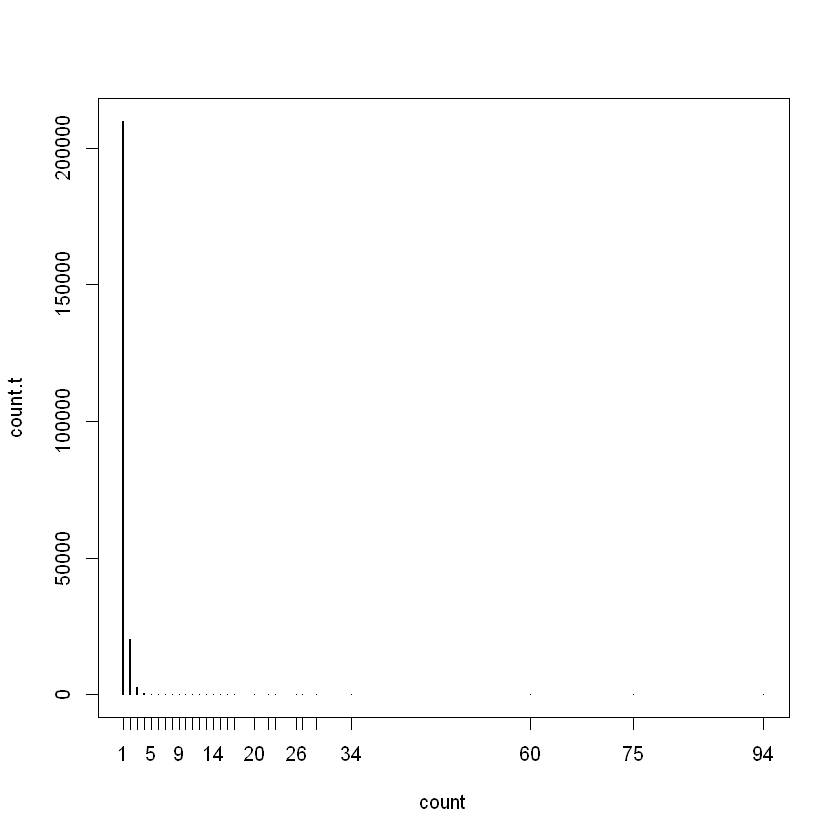

In [14]:
count <- as.data.frame(p.index[,1])
count.t <-table(count)
plot(count.t)

In [23]:
count.t

count
     1      2      3      4      5      6      7      8      9     10     11 
209845  20185   2637    529    162     53     36      8      7      5      8 
    12     13     14     15     16     17     20     22     23     26     27 
     2      8      1      3      3      3      1      2      1      1      1 
    29     34     60     75     94 
     1      1      1      2      1 

In [15]:
library(tidyr)
p.index.sep <- p.index %>% separate(id, into = c('refid', 'index'), sep = -4, convert = FALSE)
p.index.sep [1:4,]
dim(p.index.sep)

COUNT(*),refid,index,pubmed
1,4,001,2315021
1,5,001,1567819
1,9,001,1333843
1,9,002,8591034


[1] 233507      4

In [ ]:
#coauthor matching function
#f <- function(x) {
 # b<-sapply(X = x[[9]], FUN = function (X) { grep(X, x[[16]], ignore.case = TRUE, fixed = TRUE, perl=FALSE) }, simplify = "array")
  #return (length(unlist(b)))
#}
##function to combine coauthors of the same author in different patents
#unioncoauthor1<-function(x) {
 # return (union(x[[9]],x[[16]]))
#}

In [ ]:
mini.indx <- p.index.sep[1:10,]
mini.pmed <- sub.p.med.sep[1:20,]


In [ ]:
mini.merge <- merge(x = mini.indx, y = mini.pmed, by= 'refid', )

In [ ]:
dim(mini.merge)
mini.merge

In [24]:
# Now, if refid has a pmid, add it to all data submissions. 
# Now scale up...
mega.merge <- merge(x = p.index.sep, y =sub.p.med.sep, by= 'refid')

In [17]:
dim(p.index.sep)
dim(sub.p.med.sep)
dim(mega.merge)

[1] 233507      4

[1] 689703     11

[1] 200821     14

In [27]:
colnames(mega.merge)[2] <- "count"
colnames(mega.merge)

[1] "refid"      "count"      "index.x"    "pubmed.x"   "index.y"   
 [6] "reference"  "authors"    "consortium" "title"      "journal"   
[11] "pubmed.y"   "remark"     "year"       "new_id"

In [19]:
head(mega.merge[order(-mega.merge[2]), ])
max(mega.merge$count)

,refid,count,index.x,pubmed.x,index.y,reference,authors,consortium,title,journal,pubmed.y,remark,year,new_id
19215,134415676,75,002,17355172,004,4 (bases 1 to 1677),NA,J. Craig Venter Institute,Direct Submission,"Submitted (02-MAR-2007) J. Craig Venter Institute, 9704 Medical Center Drive, Rockville, MD 20850, USA",NA,NA,2007,783045
19216,134415676,75,001,17355171,004,4 (bases 1 to 1677),NA,J. Craig Venter Institute,Direct Submission,"Submitted (02-MAR-2007) J. Craig Venter Institute, 9704 Medical Center Drive, Rockville, MD 20850, USA",NA,NA,2007,783045
16785,12832032,27,006,16141072,008,8 (bases 1 to 1277),"Adachi,J., Aizawa,K., Akahira,S., Akimura,T., Arai,A., Aono,H., Arakawa,T., Bono,H., Carninci,P., Fukuda,S., Fukunishi,Y., Furuno,M., Hanagaki,T., Hara,A., Hayatsu,N., Hiramoto,K., Hiraoka,T., Hori,F., Imotani,K., Ishii,Y., Itoh,M., Izawa,M., Kasukawa,T., Kato,H., Kawai,J., Kojima,Y., Konno,H., Kouda,M., Koya,S., Kurihara,C., Matsuyama,T., Miyazaki,A., Nishi,K., Nomura,K., Numazaki,R., Ohno,M., Okazaki,Y., Okido,T., Owa,C., Saito,H., Saito,R., Sakai,C., Sakai,K., Sano,H., Sasaki,D., Shibata,K., Shibata,Y., Shinagawa,A., Shiraki,T., Sogabe,Y., Suzuki,H., Tagami,M., Tagawa,A., Takahashi,F., Tanaka,T., Tejima,Y., Toya,T., Yamamura,T., Yasunishi,A., Yoshida,K., Yoshino,M., Muramatsu,M. and Hayashizaki,Y.",NA,Direct Submission,"Submitted (10-JUL-2000) Contact:Yoshihide Hayashizaki The Institute of Physical and Chemical Research (RIKEN), Omics Science Center, RIKEN Yokohama Institute; 1-7-22 Suehiro-cho, Tsurumi-ku, Yokohama, Kanagawa 230-0045, Japan URL :http://www.osc.riken.jp/",NA,NA,2000,296948
16786,12832032,23,005,12466851,008,8 (bases 1 to 1277),"Adachi,J., Aizawa,K., Akahira,S., Akimura,T., Arai,A., Aono,H., Arakawa,T., Bono,H., Carninci,P., Fukuda,S., Fukunishi,Y., Furuno,M., Hanagaki,T., Hara,A., Hayatsu,N., Hiramoto,K., Hiraoka,T., Hori,F., Imotani,K., Ishii,Y., Itoh,M., Izawa,M., Kasukawa,T., Kato,H., Kawai,J., Kojima,Y., Konno,H., Kouda,M., Koya,S., Kurihara,C., Matsuyama,T., Miyazaki,A., Nishi,K., Nomura,K., Numazaki,R., Ohno,M., Okazaki,Y., Okido,T., Owa,C., Saito,H., Saito,R., Sakai,C., Sakai,K., Sano,H., Sasaki,D., Shibata,K., Shibata,Y., Shinagawa,A., Shiraki,T., Sogabe,Y., Suzuki,H., Tagami,M., Tagawa,A., Takahashi,F., Tanaka,T., Tejima,Y., Toya,T., Yamamura,T., Yasunishi,A., Yoshida,K., Yoshino,M., Muramatsu,M. and Hayashizaki,Y.",NA,Direct Submission,"Submitted (10-JUL-2000) Contact:Yoshihide Hayashizaki The Institute of Physical and Chemical Research (RIKEN), Omics Science Center, RIKEN Yokohama Institute; 1-7-22 Suehiro-cho, Tsurumi-ku, Yokohama, Kanagawa 230-0045, Japan URL :http://www.osc.riken.jp/",NA,NA,2000,296948
87271,2909818,20,002,16227429,003,3 (bases 1 to 1230),"Huang,C.-H.",NA,Direct Submission,"Submitted (28-OCT-1997) Biochem. & Mol. Genet., New York Blood Center, 310 East 67th Street, New York, NY 10021, USA",NA,NA,1997,144141
14981,1255794,17,001,9847074,006,6 (bases 1 to 38041),"Waterston,R.",NA,Direct Submission,"Submitted (27-APR-1999) Department of Genetics, Washington University, 4444 Forest Park Avenue, St. Louis, Missouri 63108, USA",NA,NA,1999,96442


[1] 75

In [35]:
#myvars <- c("refid", "index.x", "pubmed.x", "pubmed.y","year", "title")
pmids <- mega.merge[myvars]
dim(pmids)

[1] 200821      6

In [39]:
head(pmids)

refid,index.x,pubmed.x,pubmed.y,year,title
10000,001,2269441,NA,1989,Direct Submission
1000070,001,7558035,NA,1995,Direct Submission
1000079,001,7756267,NA,1995,Direct Submission
1000081,001,7568075,NA,1995,Direct Submission
1000083,001,8616253,NA,1995,Direct Submission
1000093,001,7651420,NA,1995,Direct Submission


In [20]:
PMIDS <- read.csv("PMC-ids.csv")

In [28]:
myvars <-c("refid", "count", "index.x", "PMID", "reference", "authors", "consortium", "title",
           "journal", "remark", "year")


colnames(PMIDS)
colnames(mega.merge)[4] <- "PMID"
colnames(mega.merge)
# sum(is.na(mega.merge$pubmed.x))


[1] "Journal.Title" "ISSN"          "eISSN"         "Year"         
 [5] "Volume"        "Issue"         "Page"          "DOI"          
 [9] "PMCID"         "PMID"          "Manuscript.Id" "Release.Date"

[1] "refid"      "count"      "index.x"    "PMID"       "index.y"   
 [6] "reference"  "authors"    "consortium" "title"      "journal"   
[11] "pubmed.y"   "remark"     "year"       "new_id"

In [31]:
mega.merge[1:2,]

refid,count,index.x,PMID,reference,authors,consortium,title,journal,remark,year
10000,1,001,2269441,2 (bases 1 to 4470),"Sconzo,G.",NA,Direct Submission,"Submitted (18-SEP-1989) Sconzo G., Dipartimento di Biologia Cellulare e Dello Sviluppo, Via Archirafi 22, 90123 Palermo, Italy",NA,1989
1000070,1,001,7558035,4 (bases 1 to 1140),"El-Maghrabi,M.R.",NA,Direct Submission,"Submitted (28-FEB-1995) M. Raafat El-Maghrabi, Physiology and Biophysics, SUNY at Stony Brook, Nicholls Rd., Stony Brook, NY 11794-8661, USA",NA,1995


In [30]:
mega.merge <- mega.merge[myvars]

In [32]:
DOI.merge <- merge(x = mega.merge, y = PMIDS, by = 'PMID') # this is an "inner join" so all and ONLY matches are returned. 
dim(DOI.merge)

[1] 55933    22

In [1]:
## Reading .parquet file. 
library(sparklyr)

Warning message:
"package 'sparklyr' was built under R version 3.4.3"

In [2]:
sc <- spark_connect(master = "local")

ERROR: Error in spark_install_find(version, hadoop_version, latest = FALSE, hint = TRUE): Spark version not installed. To install, use spark_install()


In [ ]:
# Read the downloads data in. 
